In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [4]:
df_mean = pd.read_pickle("ProjectData/dataset_energy_mean.pkl")
df_mean.drop(["LCLid","day"],inplace=True,axis=1)
df_mean.head()

,energy_mean,holiday,temperatureMax,windBearing,dewPoint,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,...,Dummy_ACORN-I,Dummy_ACORN-J,Dummy_ACORN-K,Dummy_ACORN-L,Dummy_ACORN-M,Dummy_ACORN-N,Dummy_ACORN-O,Dummy_ACORN-P,Dummy_ACORN-Q,Dummy_ACORN-U
0,1.157611,0.0,-0.943418,0.438246,-0.902711,0.660005,-1.536126,-1.159292,0.643461,-0.097697,...,0,0,0,0,0,0,0,0,0,0
1,0.443534,0.0,-1.446378,1.348239,-1.064245,0.069321,-2.355119,-1.681507,-0.143087,1.034630,...,0,0,0,0,0,0,0,0,0,0
2,-0.115384,0.0,-1.343952,1.011205,-1.191876,0.234712,-0.427408,-1.487950,0.149182,0.828753,...,0,0,0,0,0,0,0,0,0,0
3,0.037894,0.0,-1.322549,1.056143,-1.445144,0.004345,0.321521,-1.454175,0.750913,0.622875,...,0,0,0,0,0,0,0,0,0,0
4,0.600206,0.0,-1.146742,0.449480,-0.894734,-0.527271,0.134052,-1.189170,-0.370885,1.652263,...,0,0,0,0,0,0,0,0,0,0


## Using Random Forest for feature selection
### Divide data into train & test

In [8]:
y = df_mean['energy_mean']
X = df_mean[list(df_mean.columns[1:])]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Run randomforest algorithm

I have followed the instructions on this website:
https://www.yourdatateacher.com/2021/10/11/feature-selection-with-random-forest/

We want to find the feature importance

In [10]:
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

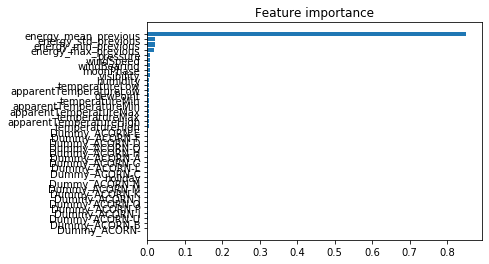

In [11]:
feature_importance = list(zip(features,rf.feature_importances_))
feature_importance.sort(key = lambda x : x[1])
plt.barh([x[0] for x in feature_importance],[x[1] for x in feature_importance])
plt.title("Feature importance")
plt.show()

The feature importance of Randomforest does not seem like a good way to select variables. We have read that Randomforest might not be the best method for selecting variables if the variables have a high correlation amongst themselves. So we make the correlation matrix.

In [12]:
df_mean.corr()

,energy_mean,holiday,temperatureMax,windBearing,dewPoint,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,...,Dummy_ACORN-I,Dummy_ACORN-J,Dummy_ACORN-K,Dummy_ACORN-L,Dummy_ACORN-M,Dummy_ACORN-N,Dummy_ACORN-O,Dummy_ACORN-P,Dummy_ACORN-Q,Dummy_ACORN-U
energy_mean,1.000000,0.000474,-0.174181,-0.016842,-0.151675,0.034919,-0.040674,-0.174965,-0.059152,0.084928,...,-0.005803,-0.008257,-0.002636,-0.010419,0.018006,-0.002165,-0.017778,-0.039417,-0.068647,-0.006144
holiday,0.000474,1.000000,-0.000244,-0.000122,-0.000284,-0.000557,0.000714,-0.000352,-0.000157,0.000111,...,-0.000114,-0.000106,0.000401,-0.000478,-0.000341,-0.000198,-0.000049,0.000144,0.000539,-0.000190
temperatureMax,-0.174181,-0.000244,1.000000,0.078716,0.869411,-0.183992,0.221343,0.987658,0.299010,-0.422993,...,-0.000625,-0.003304,0.001317,-0.008109,-0.007680,-0.003032,-0.005340,-0.000429,0.008109,0.001428
windBearing,-0.016842,-0.000122,0.078716,1.000000,0.109930,0.033491,-0.005592,0.091041,0.246196,0.021520,...,-0.000026,-0.000273,-0.000007,-0.000456,-0.001175,-0.000639,0.000669,0.000336,0.000327,0.000452
dewPoint,-0.151675,-0.000284,0.869411,0.109930,1.000000,-0.139427,0.072512,0.877499,0.052259,0.031674,...,-0.000395,-0.002910,0.001950,-0.007056,-0.007107,-0.002623,-0.004971,-0.000632,0.007709,0.001788
windSpeed,0.034919,-0.000557,-0.183992,0.033491,-0.139427,1.000000,-0.353552,-0.213406,0.227836,-0.046815,...,0.000428,0.001026,0.000499,0.002792,0.001758,0.001630,0.000760,-0.000561,-0.001209,-0.000241
pressure,-0.040674,0.000714,0.221343,-0.005592,0.072512,-0.353552,1.000000,0.232208,0.062919,-0.294079,...,-0.001296,-0.000982,-0.001399,-0.003132,-0.001898,-0.001839,0.001550,0.001446,-0.000282,0.000339
apparentTemperatureHigh,-0.174965,-0.000352,0.987658,0.091041,0.877499,-0.213406,0.232208,1.000000,0.273153,-0.383830,...,-0.000699,-0.003452,0.001127,-0.008434,-0.007796,-0.003257,-0.005322,-0.000188,0.008112,0.001546
visibility,-0.059152,-0.000157,0.299010,0.246196,0.052259,0.227836,0.062919,0.273153,1.000000,-0.617060,...,-0.000180,-0.001056,0.000757,-0.002471,-0.002621,-0.000909,-0.001281,-0.000402,0.002969,0.000760
humidity,0.084928,0.000111,-0.422993,0.021520,0.031674,-0.046815,-0.294079,-0.383830,-0.617060,1.000000,...,0.000596,0.001457,0.000345,0.003696,0.003012,0.001277,0.002226,0.000010,-0.003064,0.000329


## PCA

Our datasets have a high dimensionality with many features that are highly correlated and are likely to explaina similar thing. PCA seems like a proper method to reduce dimensionality and only include useful predictor variables. We have created four different datasets, and determining predictor importance must be done for each individual target variable.



In [ ]:
# I will use scaled pickle of cleaned preproccesing notebook?

In [5]:
filehandle = 'ProjectData/dataset_energy_mean.pkl'
mean_df = pd.read_pickle(filehandle)

# I will only use weather variables as they have theoretical basis why they fit together, would not, if ACORN from PCA they wont fit together anyway

In [6]:
# remove certain variables
pca_predictors = [x for x in mean_df.columns if 'Dummy' not in x] # remove the dummies
pca_predictors = [z for z in pca_predictors if 'energy' not in z] # remove energy variables
pca_predictors = [y for y in pca_predictors if 'day' not in y] # remove day stuff (holiday, date)
pca_predictors.remove('LCLid')

pca_df = mean_df[pca_predictors]
# which ones did we remove?
print ('Predictors removed:', [k for k in mean_df.columns if k not in pca_predictors])

Predictors removed: ['day', 'LCLid', 'energy_mean', 'holiday', 'energy_mean_previous', 'energy_max_previous', 'energy_std_previous', 'energy_min_previous', 'Dummy_ACORN-', 'Dummy_ACORN-A', 'Dummy_ACORN-B', 'Dummy_ACORN-C', 'Dummy_ACORN-D', 'Dummy_ACORN-E', 'Dummy_ACORN-F', 'Dummy_ACORN-G', 'Dummy_ACORN-H', 'Dummy_ACORN-I', 'Dummy_ACORN-J', 'Dummy_ACORN-K', 'Dummy_ACORN-L', 'Dummy_ACORN-M', 'Dummy_ACORN-N', 'Dummy_ACORN-O', 'Dummy_ACORN-P', 'Dummy_ACORN-Q', 'Dummy_ACORN-U']


In [7]:
pca_df.head() # example of data -> is scaled!

,temperatureMax,windBearing,dewPoint,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,-0.943418,0.438246,-0.902711,0.660005,-1.536126,-1.159292,0.643461,-0.097697,-1.466487,-1.199390,-1.258360,-0.745879,-0.911596,-0.831035,0.547269
1,-1.446378,1.348239,-1.064245,0.069321,-2.355119,-1.681507,-0.143087,1.034630,-1.622256,-1.650751,-1.567055,-1.194110,-1.430345,-1.419977,0.686763
2,-1.343952,1.011205,-1.191876,0.234712,-0.427408,-1.487950,0.149182,0.828753,-1.711267,-1.553555,-1.616526,-1.500795,-1.306690,-1.564046,0.791384
3,-1.322549,1.056143,-1.445144,0.004345,0.321521,-1.454175,0.750913,0.622875,-1.639741,-1.518938,-1.780768,-1.658069,-1.285578,-1.652704,0.930879
4,-1.146742,0.449480,-0.894734,-0.527271,0.134052,-1.189170,-0.370885,1.652263,-0.695586,-1.247322,-0.460897,-1.713115,-1.112159,-1.581461,1.070374


In [8]:
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

features = pca_df.to_numpy() # go to an array
pca = PCA() # instantiate PCA
pca.fit(features) # first fit 

first = pd.DataFrame() # cut off of eigenvalues is at 1 so only 3 variables
first['Component Eigenvalue'] = pca.explained_variance_
first['Explained variance'] = pca.explained_variance_ratio_
first # show df


,Component Eigenvalue,Explained variance
0,8.613948,0.574253
1,1.724557,0.114968
2,1.385987,0.092397
3,1.048416,0.069893
4,0.945503,0.063032
5,0.566981,0.037798
6,0.329292,0.021952
7,0.188142,0.012543
8,0.146255,0.009750
9,0.021002,0.001400


### Only use components where eigenvalue > 1 will use only 3 components
Since PCA is iterative need to run same analysis again now with only 3 components and asses their eigenvalues again.

In [9]:
pca2 = PCA(n_components=3) # new fit with only 3
pca2.fit(features)

second = pd.DataFrame()
second['Component Eigenvalue'] = pca2.explained_variance_
second['Explained variance'] = pca2.explained_variance_ratio_ 
second # show df


,Component Eigenvalue,Explained variance
0,8.613948,0.574253
1,1.724557,0.114968
2,1.385987,0.092397


After this move we acieved higher component scores now check communality (the shared variance/total variance sould be higher then 25%

In [10]:
pd.DataFrame(pca2.components_).transpose().sum(axis = 1) # only take vairables where |h| > 0.25  (absolute values need to be higher)
# seems need to drop variable 14! makes sense as is Moonphase, seems not immedeatly connected to weather 

0     0.304219
1    -0.352309
2     0.412778
3    -0.934612
4     0.594218
5     0.344715
6    -0.694058
7     0.311558
8     0.393923
9     0.332761
10    0.336680
11    0.270289
12    0.313045
13    0.371566
14    0.019051
dtype: float64

Next step is to remove moonphase as it has a very low communality. (so not much shared variance) \
Then reiterate, start with full, and then reduce to chek eigen values >1 to discern an amount of features, check communality again.

In [11]:
pca3 = PCA()
features3df = pca_df.drop(pca_df.columns[-1], axis = 1) #conveniently the last column directly transfer to array
features3 = features3df.to_numpy()
pca3.fit(features3)

third = pd.DataFrame()
third['Component Eigenvalue'] = pca3.explained_variance_
third['Explained variance'] = pca3.explained_variance_ratio_ 
third # show df

,Component Eigenvalue,Explained variance
0,8.613185,0.615214
1,1.716384,0.122596
2,1.380643,0.098615
3,1.005019,0.071786
4,0.567973,0.040569
5,0.331281,0.023662
6,0.188169,0.013440
7,0.146406,0.010457
8,0.021004,0.001500
9,0.011525,0.000823


After removal of moonphase component 0 got more explained variance thus a better fit. Will now include 4 components as 4th also has eigenvalue >1

In [12]:
pca3 = PCA(n_components=4)
pca3.fit(features3)

third = pd.DataFrame()
third['Component Eigenvalue'] = pca3.explained_variance_
third['Explained variance'] = pca3.explained_variance_ratio_ 
third # show df



,Component Eigenvalue,Explained variance
0,8.613185,0.615214
1,1.716384,0.122596
2,1.380643,0.098615
3,1.005019,0.071786


In [13]:
print ('Could get ' ,third['Explained variance'].sum(), '% of variance in 4 variables ')

Could get  0.9082105891630461 % of variance in 4 variables 


In [14]:
# check communalites again
pd.DataFrame(pca3.components_, columns=features3df.columns).transpose().sum(axis = 1) # only take vairables where |h| > 0.25  (absolute values need to be higher)
# scores seem good, except temperature min which is below cut off value, so need to drop it

temperatureMax             0.270450
windBearing                0.556536
dewPoint                   0.459330
windSpeed                 -1.209096
pressure                   0.768383
apparentTemperatureHigh    0.339180
visibility                -0.615976
humidity                   0.508611
apparentTemperatureLow     0.380207
apparentTemperatureMax     0.325826
temperatureLow             0.295350
temperatureMin             0.230138
temperatureHigh            0.277560
apparentTemperatureMin     0.364289
dtype: float64

In [15]:
features4df = features3df.drop('temperatureMin', axis =1)
features4= features4df.to_numpy()
pca4 = PCA(n_components=4)
pca4.fit(features4)

fourth = pd.DataFrame()
fourth['Component Eigenvalue'] = pca4.explained_variance_
fourth['Explained variance'] = pca4.explained_variance_ratio_ 
fourth # show df



,Component Eigenvalue,Explained variance
0,7.722790,0.594048
1,1.708109,0.131390
2,1.356669,0.104357
3,1.003527,0.077193


In [43]:
pd.DataFrame(pca4.components_, columns=features4df.columns).transpose().sum(axis = 1) # only take vairables where |h| > 0.25  (absolute values need to be higher)
# now all communalities are good!, albeit some a little low (cut off value is 0.25, so 0.27 is not very high)

temperatureMax             0.279040
windBearing                0.541791
dewPoint                   0.440898
windSpeed                 -1.234213
pressure                   0.829360
apparentTemperatureHigh    0.346646
visibility                -0.588858
humidity                   0.453980
apparentTemperatureLow     0.376346
apparentTemperatureMax     0.332153
temperatureLow             0.288653
temperatureHigh            0.287035
apparentTemperatureMin     0.363873
dtype: float64

In [44]:
# inspect component matrix
components = pd.DataFrame(pca4.components_, columns = features4df.columns).transpose()
components_filt = components[(components>0.3) |(components<-0.3)]# choose only where value is >0.35 or <-0.35 
components_filt # many values between 0.3, 0.35 

,0,1,2,3
temperatureMax,0.354802,NaN,NaN,NaN
windBearing,NaN,NaN,NaN,0.914305
dewPoint,0.326822,NaN,NaN,NaN
windSpeed,NaN,NaN,-0.605337,NaN
pressure,NaN,NaN,0.674895,NaN
apparentTemperatureHigh,0.354705,NaN,NaN,NaN
visibility,NaN,-0.644956,NaN,NaN
humidity,NaN,0.611361,NaN,NaN
apparentTemperatureLow,0.342456,NaN,NaN,NaN
apparentTemperatureMax,0.354556,NaN,NaN,NaN


As can be seen from dataframe above, many scores are not above 0.35 (but that number is arbirtrary) according to past course over 0.3 is to high to ignore. \
We see 4 components where first one summarizes the temperature features + dewpoint. \
Second compenent captures visibility and humidity, which indeed seems quite correlated \
Thrid shows relation between windSpeed and pressure. \
Last component only scores high on the windbearing, so summarizing it in a 3th component would not make sense, this feature should stay as a stand alone feauture as it is not correlated with the other variables that well.

So, reiterate exclude windbearing from analysis

In [45]:
features5df = features4df.drop('windBearing', axis =1 )# btw windbearing is from 0-360? how does this work when normalizing? # Dropped windBearing from PCA, needs to be own feature!
pca5 = PCA(n_components=3) # now 4-1 components :)

features5 = features5df.to_numpy()
pca5.fit(features5)

fifth = pd.DataFrame()
fifth['Component Eigenvalue'] = pca5.explained_variance_
fifth['Explained variance'] = pca5.explained_variance_ratio_ 
print ('Could get ' ,fifth['Explained variance'].sum(), '% of variance in 4 variables ')
fifth # show df

Could get  0.8946917323277739 % of variance in 4 variables 


,Component Eigenvalue,Explained variance
0,7.713943,0.642816
1,1.689213,0.140765
2,1.333359,0.111111


In [46]:
pd.DataFrame(pca5.components_, columns=features5df.columns).transpose().sum(axis = 1) # only take vairables where |h| > 0.25  (absolute values need to be higher) 
# all communalites are okay!

temperatureMax             0.309722
dewPoint                   0.731564
windSpeed                  0.324186
pressure                  -0.739862
apparentTemperatureHigh    0.322660
visibility                -0.393747
humidity                   0.679428
apparentTemperatureLow     0.495366
apparentTemperatureMax     0.337139
temperatureLow             0.534577
temperatureHigh            0.298398
apparentTemperatureMin     0.511627
dtype: float64

In [47]:
components = pd.DataFrame(pca5.components_, columns = features5df.columns).transpose()
components_filt = components[(components>0.30) |(components<-0.30)]# choose only where value is >0.35 or <-0.35 
components_filt # many values between 0.3, 0.35 

,0,1,2
temperatureMax,0.355069,NaN,NaN
dewPoint,0.326911,NaN,NaN
windSpeed,NaN,NaN,0.660136
pressure,NaN,NaN,-0.691087
apparentTemperatureHigh,0.354918,NaN,NaN
visibility,NaN,-0.632278,NaN
humidity,NaN,0.641941,NaN
apparentTemperatureLow,0.342787,NaN,NaN
apparentTemperatureMax,0.354753,NaN,NaN
temperatureLow,0.338348,NaN,NaN


So, in conclusion you can see the we reduced 13 features into 3, these combined retain 89% of the variance. The first component mainly captures temperature metrics, the second visibility and the third windspeed en pressure. 

In the dataframe it is now possible to remove all these 13 variables, and replace them with the transformed scores. 

It works as follows for example to see how high a day scores on component '1' when standardized visibility score is 1 and humidity 0 (could be any float value)

Score i = -0.632 * 1 + 0*64194 = -0.632 is how this instance would score on factor 2 -> so like that we reduce 2 variables to 0. 
The other features might also contribute, but these will be small values and hence do not matter that much


In [48]:
# the first one does not have any super high scorers

# lets try the transform anyway

transformed = pca5.transform(features5)

In [49]:
newfeatures = pd.DataFrame(transformed, columns = ['TemperatureScore',
                                                   'HumidityScore',
                                                   'WindPressureScore'])
newfeatures

,TemperatureScore,HumidityScore,WindPressureScore
0,-3.110516,-0.888208,1.201421
1,-4.485254,0.523575,1.364945
2,-4.226363,-0.177935,0.106208
3,-4.161656,-0.817140,-0.572400
4,-3.095635,1.062659,-0.515100
...,...,...,...
3465241,-0.622665,-0.959139,1.526659
3465242,-0.093711,-0.940623,1.048743
3465243,-1.521595,-0.613057,1.480177
3465244,-1.226704,-1.160583,-0.119497


In [50]:
afterPCA_mean_df =  mean_df.drop(features5df.columns, axis = 1)# entire dataframe again -> remove our 13 variables
Final_Df = afterPCA_mean_df.merge(newfeatures, on=afterPCA_mean_df.index, how = 'right').drop('key_0', axis =1) # merge the two 
Final_Df




,day,LCLid,energy_mean,holiday,windBearing,temperatureMin,moonPhase,energy_mean_previous,energy_max_previous,energy_std_previous,...,Dummy_ACORN-L,Dummy_ACORN-M,Dummy_ACORN-N,Dummy_ACORN-O,Dummy_ACORN-P,Dummy_ACORN-Q,Dummy_ACORN-U,TemperatureScore,HumidityScore,WindPressureScore
0,2011-12-15,MAC000131,1.157611,0.0,0.438246,-0.745879,0.547269,-0.000532,-0.003139,0.000005,...,0,0,0,0,0,0,0,-3.110516,-0.888208,1.201421
1,2011-12-16,MAC000131,0.443534,0.0,1.348239,-1.194110,0.686763,1.157083,0.046966,0.434131,...,0,0,0,0,0,0,0,-4.485254,0.523575,1.364945
2,2011-12-17,MAC000131,-0.115384,0.0,1.011205,-1.500795,0.791384,0.443127,0.418128,0.710531,...,0,0,0,0,0,0,0,-4.226363,-0.177935,0.106208
3,2011-12-18,MAC000131,0.037894,0.0,1.056143,-1.658069,0.930879,-0.115697,-0.226915,0.102775,...,0,0,0,0,0,0,0,-4.161656,-0.817140,-0.572400
4,2011-12-19,MAC000131,0.600206,0.0,0.449480,-1.713115,1.070374,0.037555,-0.240384,0.197560,...,0,0,0,0,0,0,0,-3.095635,1.062659,-0.515100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465241,2012-07-23,MAC001506,-0.195089,0.0,0.056273,0.156482,0.965753,-0.460515,-0.490319,-0.498659,...,0,0,0,0,0,0,0,-0.622665,-0.959139,1.526659
3465242,2012-07-24,MAC001506,-0.490369,0.0,-0.134713,0.022799,1.105247,-0.195388,-0.123648,-0.137685,...,0,0,0,0,0,0,0,-0.093711,-0.940623,1.048743
3465243,2012-07-25,MAC001506,-0.670361,0.0,0.078742,-0.213112,1.244742,-0.490618,-0.384059,-0.514931,...,0,0,0,0,0,0,0,-1.521595,-0.613057,1.480177
3465244,2012-07-26,MAC001506,-0.479639,0.0,0.359604,-0.728185,1.384236,-0.670580,-0.988693,-0.885247,...,0,0,0,0,0,0,0,-1.226704,-1.160583,-0.119497


In [51]:
print ('Following columns/features where removed: ',[removed for removed in mean_df.columns if removed not in Final_Df.columns])

Following columns/features where removed:  ['temperatureMax', 'dewPoint', 'windSpeed', 'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity', 'apparentTemperatureLow', 'apparentTemperatureMax', 'temperatureLow', 'temperatureHigh', 'apparentTemperatureMin']


In [52]:
# write as pickle

Final_Df.to_pickle('PCAdf.pkl')